# Procesamiento #

## Integrantes: ##
- ### Ricardo Raúl Castro Luna - 18131227 ###

## Descripción: ##  

- Trabajo explicado en clase.
- Se calificará el uso de pandas, numpy y matplotlib. En caso de no utilizarlas, no se podrá evaluar el trabajo.
- Una gráfica  para el promedio de las señales, otra para la desviación estándar, otra para la varianza y otra para la covarianza. Hay que explicar cada gráfica.

In [1]:
# import de la libreria de Pandas
import pandas as pd

# import de Matplotlib, pyplot
import matplotlib.pyplot as plt

# ruta de la ubicación de los datasets
ruta = "D:\\"

# Circuito 4

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [2]:
# Lectura desde un dataset CSV para la creación de los dataframes
#----------------------------------------------
df_A04 = pd.read_csv(ruta+"A_Circuito_04.AV")
df_B04 = pd.read_csv(ruta+"B_Circuito_04.AV")
#----------------------------------------------


# Conversión de los datos de 'A' Y 'B' en valores absolutos
#----------------------------------------------
''' 
Se aplico la función '.abs()' de DataFrame para la conversion de estos,
 en las columnas de 'Values' de 'A' y 'B' respectivamente para luego igualar los nuevos valores de las columnas
 en estas mismas.
 El cual este regresa un objeto con valores absolutos, que solo toma en cuantos valores numéricos.
 Tampoco funciona con Nan.
''' 
#----------------------------------------------
df_A04['Values'] = df_A04['Values'].abs()
df_B04['Values'] = df_B04['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [3]:
# Union de los dataframes de 'A' y 'B' y renombramiento de las columnas
#----------------------------------------------
''' 
'merge' es una funcion de la liberia 'pandas' que nos permite juntar 2 o más dataframes,
  este tiene diferentes tipos de parametros, pero en este caso solo recibe como parametros los dataframes de 'A' y 'B'
  y 'on' que recibe una columna como indice para la union de estos, 
  esta columna debe existir en todos los dataframes que se planean unir;
  además de usar el valor por defecto del parametro 'how' que es'inner' por que no esta declaro en el código de abajo,
  el cual utiliza la intersección de las columnas de ambos dataframes, de forma similar a una unión interna de SQL.
'''

'''
Luego con la función '.rename()' del Dataframe, le envie como parametro un diccionario con los nombres de las columnas,
  además de 'inplace' el cual se encarga de devolver un nuevo DataFrame. Si es True, se ignora el valor de la copia,
 este tiene como valor por defecto un False.
  
'''
#----------------------------------------------
df_04 = pd.merge(df_A04, df_B04, on ='Datetime')
df_04.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_04

,Datetime,A,B
0,2022-01-01 00:00:01,108.59,108.96
1,2022-01-01 00:01:01,110.26,110.10
2,2022-01-01 00:01:21,110.86,111.37
3,2022-01-01 00:01:41,110.70,110.12
4,2022-01-01 00:02:01,111.21,111.29
...,...,...,...
479299,2022-01-15 23:59:47,107.50,107.15
479300,2022-01-15 23:59:49,108.14,109.04
479301,2022-01-15 23:59:49,108.14,107.50
479302,2022-01-15 23:59:55,108.60,107.55


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

#### Que es? ####
La media aritmética es un tipo de media que otorga la misma ponderación a todos los valores.

![Media](https://economipedia.com/wp-content/uploads/Formula-media-aritmetica-1.jpg)

- **∑:** El sumatorio nos indica que debemos sumar un conjunto de valores desde el primero, hasta el N.
- **x:** La variable X es sobre la que calculamos la media aritmética.
- **n:** El número total de observaciones.
- **i:** Es la posición de la observación.

In [4]:
# Promedio
#----------------------------------------------
''' 
Se utilizó la función '.mean()' del Dataframe para sacar el promedio de valores de 'A' y 'B', 
 por eso los dobles '[]', ya que el primero es para poner la columna pero como en este caso se usan dos columnas estas deben
 estar dentro de otro '[]', para despues usar la función '.mean()', 
 el cual usaremos solo un parametro en este sin contar los parametros por defecto,
 el parametro 'axis' es para asignar sobre que eje se aplicará la función, '0' para el indice y '1' para la columna,
 en nuestro usamos el '1' para que este nos regrese una columna con el promedio de cada renglón.
 Y al final esta columna se le iguala a una nueva columna llamada 'Mean' del dataframe.
''' 
#----------------------------------------------
df_04['Mean'] = df_04[['A', 'B']].mean(axis = 1)
df_04

,Datetime,A,B,Mean
0,2022-01-01 00:00:01,108.59,108.96,108.775
1,2022-01-01 00:01:01,110.26,110.10,110.180
2,2022-01-01 00:01:21,110.86,111.37,111.115
3,2022-01-01 00:01:41,110.70,110.12,110.410
4,2022-01-01 00:02:01,111.21,111.29,111.250
...,...,...,...,...
479299,2022-01-15 23:59:47,107.50,107.15,107.325
479300,2022-01-15 23:59:49,108.14,109.04,108.590
479301,2022-01-15 23:59:49,108.14,107.50,107.820
479302,2022-01-15 23:59:55,108.60,107.55,108.075


### Desviación Estándar ###

#### Que es? ####
Es una medida que ofrece información sobre la dispersión media de una variable. La desviación estándar es siempre mayor o igual que cero.

![Std](https://economipedia.com/wp-content/uploads/Formula-Desviacion-Tipica.jpg)

- **∑:** El sumatorio nos indica que debemos sumar un conjunto de valores desde el primero, hasta el N.
- **n:** El número total de observaciones.
- **xi:** observación número i de la variable X. i puede tomará valores entre 1 y n.
- **i:** Es la posición de la observación.
- **x̄:** Es la media de la variable X.

In [5]:
# Desviación Estándar
#----------------------------------------------
''' 
Se utilizó la función '.std()' del Dataframe para sacar la desviación estándar de valores de 'A' y 'B', 
 por eso los dobles '[]', ya que el primero es para poner la columna pero como en este caso se usan dos columnas estas deben
 estar dentro de otro '[]', para despues usar la función '.std()', 
 el cual usaremos solo un parametro en este sin contar los parametros por defecto,
 el parametro 'axis' es para asignar sobre que eje se aplicará la función, '0' para el indice y '1' para la columna,
 en nuestro usamos el '1' para que este nos regrese una columna con la desviación estándar de cada renglón.
 Y al final esta columna se le iguala a una nueva columna llamada 'Std' del dataframe.
''' 
#----------------------------------------------
df_04['Std'] = df_04[['A', 'B']].std(axis = 1)
df_04

,Datetime,A,B,Mean,Std
0,2022-01-01 00:00:01,108.59,108.96,108.775,0.261630
1,2022-01-01 00:01:01,110.26,110.10,110.180,0.113137
2,2022-01-01 00:01:21,110.86,111.37,111.115,0.360624
3,2022-01-01 00:01:41,110.70,110.12,110.410,0.410122
4,2022-01-01 00:02:01,111.21,111.29,111.250,0.056569
...,...,...,...,...,...
479299,2022-01-15 23:59:47,107.50,107.15,107.325,0.247487
479300,2022-01-15 23:59:49,108.14,109.04,108.590,0.636396
479301,2022-01-15 23:59:49,108.14,107.50,107.820,0.452548
479302,2022-01-15 23:59:55,108.60,107.55,108.075,0.742462


### Varianza ###

#### Que es? ####
La varianza es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media.

![Varianza](https://economipedia.com/wp-content/uploads/2017/10/varianza-300x78.jpg)

- **X:** Variable sobre la que se pretenden calcular la varianza
- **xi:** Observación número i de la variable X. i puede tomará valores entre 1 y n.
- **n:** Número de observaciones.
- **x̄:** Es la media de la variable X.

In [6]:
# Varianza
#----------------------------------------------
''' 
Se utilizó la función '.var()' del Dataframe para sacar la varianza de valores de 'A' y 'B', 
 por eso los dobles '[]', ya que el primero es para poner la columna pero como en este caso se usan dos columnas estas deben
 estar dentro de otro '[]', para despues usar la función '.var()', 
 el cual usaremos solo un parametro en este sin contar los parametros por defecto,
 el parametro 'axis' es para asignar sobre que eje se aplicará la función, '0' para el indice y '1' para la columna,
 en nuestro usamos el '1' para que este nos regrese una columna con la varianza de cada renglón.
 Y al final esta columna se le iguala a una nueva columna llamada 'Var' del dataframe.
''' 
#----------------------------------------------
df_04['Var'] = df_04[['A', 'B']].var(axis = 1)
df_04

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:00:01,108.59,108.96,108.775,0.261630,0.06845
1,2022-01-01 00:01:01,110.26,110.10,110.180,0.113137,0.01280
2,2022-01-01 00:01:21,110.86,111.37,111.115,0.360624,0.13005
3,2022-01-01 00:01:41,110.70,110.12,110.410,0.410122,0.16820
4,2022-01-01 00:02:01,111.21,111.29,111.250,0.056569,0.00320
...,...,...,...,...,...,...
479299,2022-01-15 23:59:47,107.50,107.15,107.325,0.247487,0.06125
479300,2022-01-15 23:59:49,108.14,109.04,108.590,0.636396,0.40500
479301,2022-01-15 23:59:49,108.14,107.50,107.820,0.452548,0.20480
479302,2022-01-15 23:59:55,108.60,107.55,108.075,0.742462,0.55125


### Covarianza ###

#### Que es? ####
La covarianza es el valor que refleja en qué cuantía dos variables aleatorias varían de forma conjunta respecto a sus medias.

![Covarianza](https://economipedia.com/wp-content/uploads/F%C3%B3rmula-de-la-Covarianza.jpg)

- **n:** El número total de observaciones.
- **i:** Es la posición de la observación.
- **x̄:** Es la media de la variable X.
- **ȳ:** Es la media de la variable Y.

In [7]:
# Varianza
#----------------------------------------------
''' 
Se utilizó la función '.cov()' del Dataframe para sacar la varianza de valores de 'A' y 'B', 
 por eso los dobles '[]', ya que el primero es para poner la columna pero como en este caso se usan dos columnas estas deben
 estar dentro de otro '[]', para despues usar la función '.cov()', 
 este recibio ningún en comparación a los casos anteriores,
 ya que este regresa una matriz que contiene la covarianza entre los elementos de un vector.
 Y por eso mismo que regresa una matriz no se le puede igualar a una nueva columna del dataframe
 ya que saltaria un error.
''' 
#----------------------------------------------
df_04[['A','B']].cov()

,A,B
A,1082.317322,1081.854447
B,1081.854447,1082.402703


## Gráficación ##

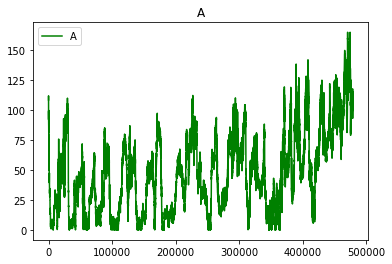

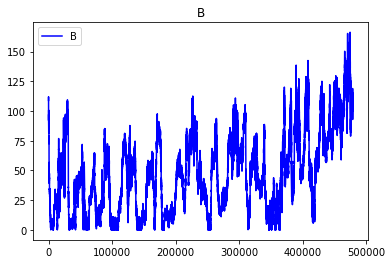

In [8]:
# Gráficas
#----------------------------------------------
'''
Se gráfica los datos de 'A' y 'B' cada uno con su respectivo gráfica,
 se le aplica a la columna del dataframe la función '.plot()',
 en este caso la funcíón solo se le envio el parametro de color que es opcional.
 Para despues usar '.title()' para cambiarle el nombre a la gráfica.
'''
#----------------------------------------------
df_04[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_04[['B']].plot(color="blue")
plt.title('B')
plt.show()

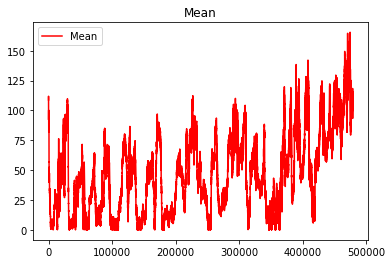

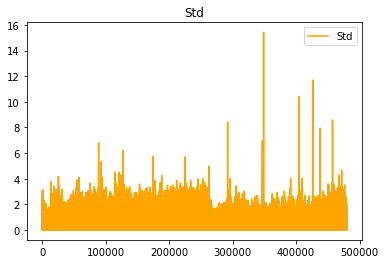

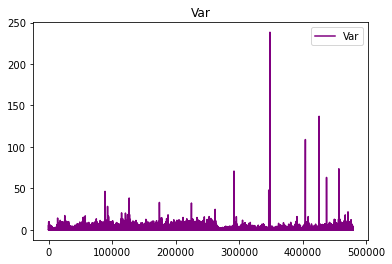

In [9]:
# Gráficas
#----------------------------------------------
'''
Se gráfica los datos de 'Mean','Std','Var' cada uno con su respectivo gráfica,
 se le aplica a la columna del dataframe la función '.plot()',
 en este caso la funcíón solo se le envio el parametro de color que es opcional.
 Para despues usar '.title()' para cambiarle el nombre a la gráfica.
 
 
Todas las operaciones realizadas con los datos del dataframe se han gráficado exceptuando a del covarianza
  ya que este nos regresaba una matriz.
'''
#----------------------------------------------
df_04[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_04[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_04[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

## Conclusiones ##

En muchos momentos tuvo problemas en entender el proposito de la actividad por los factores de mi ausencia en el dia de la explicación de esta y en entender la actividad misma, lo que provoco horas de investigación en la documentación y el uso de paginas como stack overflow, pero cuando por fin descubrí como juntar dos dataframes en base a una columna y sin crear datos duplicados empecé a tener un mejor compredimiento en el manejo de los dataframes y cosas como las funciones para sacar la media y desviación los pude lograr con una lectura de la documentación y una simple línea de código.

# Circuito 5

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [10]:
#----------------------------------------------
df_A05 = pd.read_csv(ruta+"A_Circuito_05.AV")
df_B05 = pd.read_csv(ruta+"B_Circuito_05.AV")
#----------------------------------------------

#----------------------------------------------
df_A05['Values'] = df_A05['Values'].abs()
df_B05['Values'] = df_B05['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [11]:
#----------------------------------------------
df_05 = pd.merge(df_A05, df_B05, on ='Datetime')
df_05.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_05

,Datetime,A,B
0,2022-01-01 00:00:19,57.8,57.8
1,2022-01-01 00:00:37,57.8,57.8
2,2022-01-01 00:00:45,59.2,59.2
3,2022-01-01 00:00:46,56.8,56.8
4,2022-01-01 00:00:48,58.2,58.2
...,...,...,...
411410,2022-01-15 23:59:46,36.9,36.9
411411,2022-01-15 23:59:48,37.4,37.4
411412,2022-01-15 23:59:51,36.9,36.9
411413,2022-01-15 23:59:51,35.9,36.9


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [12]:
df_05['Mean'] = df_05[['A', 'B']].mean(axis = 1)
df_05

,Datetime,A,B,Mean
0,2022-01-01 00:00:19,57.8,57.8,57.8
1,2022-01-01 00:00:37,57.8,57.8,57.8
2,2022-01-01 00:00:45,59.2,59.2,59.2
3,2022-01-01 00:00:46,56.8,56.8,56.8
4,2022-01-01 00:00:48,58.2,58.2,58.2
...,...,...,...,...
411410,2022-01-15 23:59:46,36.9,36.9,36.9
411411,2022-01-15 23:59:48,37.4,37.4,37.4
411412,2022-01-15 23:59:51,36.9,36.9,36.9
411413,2022-01-15 23:59:51,35.9,36.9,36.4


### Desviación Estándar ###

In [13]:
df_05['Std'] = df_05[['A', 'B']].std(axis = 1)
df_05

,Datetime,A,B,Mean,Std
0,2022-01-01 00:00:19,57.8,57.8,57.8,0.000000
1,2022-01-01 00:00:37,57.8,57.8,57.8,0.000000
2,2022-01-01 00:00:45,59.2,59.2,59.2,0.000000
3,2022-01-01 00:00:46,56.8,56.8,56.8,0.000000
4,2022-01-01 00:00:48,58.2,58.2,58.2,0.000000
...,...,...,...,...,...
411410,2022-01-15 23:59:46,36.9,36.9,36.9,0.000000
411411,2022-01-15 23:59:48,37.4,37.4,37.4,0.000000
411412,2022-01-15 23:59:51,36.9,36.9,36.9,0.000000
411413,2022-01-15 23:59:51,35.9,36.9,36.4,0.707107


### Varianza ###

In [14]:
df_05['Var'] = df_05[['A', 'B']].var(axis = 1)
df_05

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:00:19,57.8,57.8,57.8,0.000000,0.00
1,2022-01-01 00:00:37,57.8,57.8,57.8,0.000000,0.00
2,2022-01-01 00:00:45,59.2,59.2,59.2,0.000000,0.00
3,2022-01-01 00:00:46,56.8,56.8,56.8,0.000000,0.00
4,2022-01-01 00:00:48,58.2,58.2,58.2,0.000000,0.00
...,...,...,...,...,...,...
411410,2022-01-15 23:59:46,36.9,36.9,36.9,0.000000,0.00
411411,2022-01-15 23:59:48,37.4,37.4,37.4,0.000000,0.00
411412,2022-01-15 23:59:51,36.9,36.9,36.9,0.000000,0.00
411413,2022-01-15 23:59:51,35.9,36.9,36.4,0.707107,0.50


### Covarianza ###

In [15]:
df_05[['A','B']].cov()

,A,B
A,783.984371,783.924885
B,783.924885,784.030983


## Gráficación ##

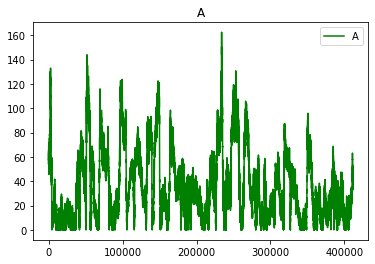

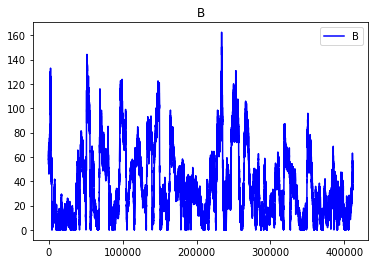

In [16]:
#----------------------------------------------
df_05[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_05[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

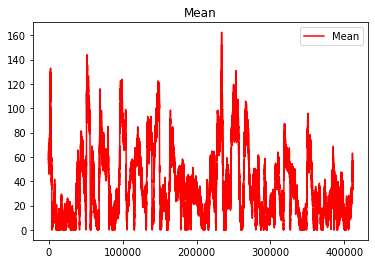

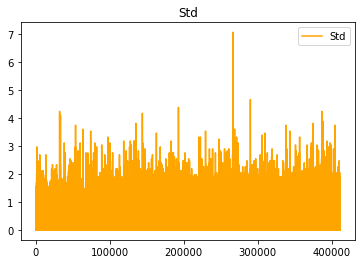

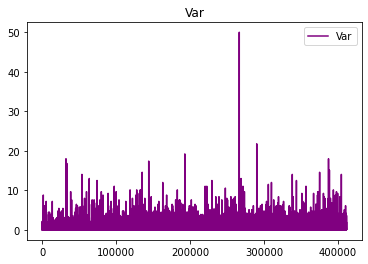

In [17]:
#----------------------------------------------
df_05[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_05[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_05[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito 8

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [18]:
#---------------------------------------------
df_A08 = pd.read_csv(ruta+"A_Circuito_08.AV")
df_B08 = pd.read_csv(ruta+"B_Circuito_08.AV")
#----------------------------------------------

#----------------------------------------------
df_A08['Values'] = df_A08['Values'].abs()
df_B08['Values'] = df_B08['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [19]:
#----------------------------------------------
df_08 = pd.merge(df_A08, df_B08, on ='Datetime')
df_08.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_08

,Datetime,A,B
0,2022-01-01 00:00:41,110.88,112.09
1,2022-01-01 00:01:01,112.83,110.88
2,2022-01-01 00:01:01,112.83,111.99
3,2022-01-01 00:01:21,113.73,113.54
4,2022-01-01 00:02:21,111.94,112.31
...,...,...,...
466340,2022-01-15 23:59:49,110.60,109.96
466341,2022-01-15 23:59:55,111.06,109.99
466342,2022-01-15 23:59:55,111.06,112.19
466343,2022-01-15 23:59:57,111.53,111.06


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [20]:
df_08['Mean'] = df_08[['A', 'B']].mean(axis = 1)
df_08

,Datetime,A,B,Mean
0,2022-01-01 00:00:41,110.88,112.09,111.485
1,2022-01-01 00:01:01,112.83,110.88,111.855
2,2022-01-01 00:01:01,112.83,111.99,112.410
3,2022-01-01 00:01:21,113.73,113.54,113.635
4,2022-01-01 00:02:21,111.94,112.31,112.125
...,...,...,...,...
466340,2022-01-15 23:59:49,110.60,109.96,110.280
466341,2022-01-15 23:59:55,111.06,109.99,110.525
466342,2022-01-15 23:59:55,111.06,112.19,111.625
466343,2022-01-15 23:59:57,111.53,111.06,111.295


### Desviación Estándar ###

In [21]:
df_08['Std'] = df_08[['A', 'B']].std(axis = 1)
df_08

,Datetime,A,B,Mean,Std
0,2022-01-01 00:00:41,110.88,112.09,111.485,0.855599
1,2022-01-01 00:01:01,112.83,110.88,111.855,1.378858
2,2022-01-01 00:01:01,112.83,111.99,112.410,0.593970
3,2022-01-01 00:01:21,113.73,113.54,113.635,0.134350
4,2022-01-01 00:02:21,111.94,112.31,112.125,0.261630
...,...,...,...,...,...
466340,2022-01-15 23:59:49,110.60,109.96,110.280,0.452548
466341,2022-01-15 23:59:55,111.06,109.99,110.525,0.756604
466342,2022-01-15 23:59:55,111.06,112.19,111.625,0.799031
466343,2022-01-15 23:59:57,111.53,111.06,111.295,0.332340


### Varianza ###

In [22]:
df_08['Var'] = df_08[['A', 'B']].var(axis = 1)
df_08

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:00:41,110.88,112.09,111.485,0.855599,0.73205
1,2022-01-01 00:01:01,112.83,110.88,111.855,1.378858,1.90125
2,2022-01-01 00:01:01,112.83,111.99,112.410,0.593970,0.35280
3,2022-01-01 00:01:21,113.73,113.54,113.635,0.134350,0.01805
4,2022-01-01 00:02:21,111.94,112.31,112.125,0.261630,0.06845
...,...,...,...,...,...,...
466340,2022-01-15 23:59:49,110.60,109.96,110.280,0.452548,0.20480
466341,2022-01-15 23:59:55,111.06,109.99,110.525,0.756604,0.57245
466342,2022-01-15 23:59:55,111.06,112.19,111.625,0.799031,0.63845
466343,2022-01-15 23:59:57,111.53,111.06,111.295,0.332340,0.11045


### Covarianza ###

In [23]:
df_08[['A','B']].cov()

,A,B
A,1136.884118,1136.442264
B,1136.442264,1137.058133


## Gráficación ##

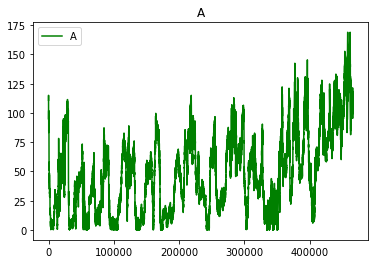

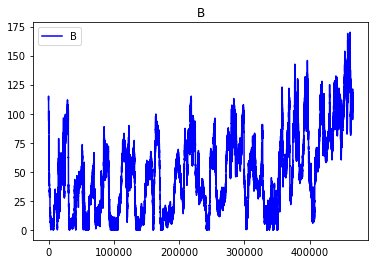

In [24]:
#----------------------------------------------
df_08[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_08[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

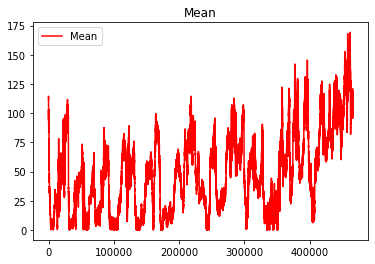

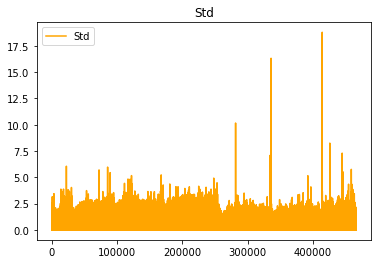

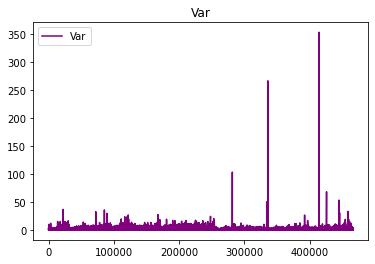

In [25]:
#----------------------------------------------
df_08[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_08[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_08[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito 11

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [26]:
#---------------------------------------------
df_A11 = pd.read_csv(ruta+"A_Circuito_11.AV")
df_B11 = pd.read_csv(ruta+"B_Circuito_11.AV")
#----------------------------------------------

#----------------------------------------------
df_A11['Values'] = df_A11['Values'].abs()
df_B11['Values'] = df_B11['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [27]:
#----------------------------------------------
df_11 = pd.merge(df_A11, df_B11, on ='Datetime')
df_11.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_11

,Datetime,A,B
0,2022-01-01 00:04:48,132.00,132.00
1,2022-01-01 00:05:12,130.23,130.23
2,2022-01-01 00:05:50,128.58,128.58
3,2022-01-01 00:06:02,129.92,129.92
4,2022-01-01 00:06:57,131.38,131.38
...,...,...,...
115134,2022-01-15 23:57:48,139.37,139.37
115135,2022-01-15 23:58:08,140.46,140.81
115136,2022-01-15 23:58:10,140.35,139.21
115137,2022-01-15 23:59:49,138.70,137.10


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [28]:
df_11['Mean'] = df_11[['A', 'B']].mean(axis = 1)
df_11

,Datetime,A,B,Mean
0,2022-01-01 00:04:48,132.00,132.00,132.000
1,2022-01-01 00:05:12,130.23,130.23,130.230
2,2022-01-01 00:05:50,128.58,128.58,128.580
3,2022-01-01 00:06:02,129.92,129.92,129.920
4,2022-01-01 00:06:57,131.38,131.38,131.380
...,...,...,...,...
115134,2022-01-15 23:57:48,139.37,139.37,139.370
115135,2022-01-15 23:58:08,140.46,140.81,140.635
115136,2022-01-15 23:58:10,140.35,139.21,139.780
115137,2022-01-15 23:59:49,138.70,137.10,137.900


### Desviación Estándar ###

In [29]:
df_11['Std'] = df_11[['A', 'B']].std(axis = 1)
df_11

,Datetime,A,B,Mean,Std
0,2022-01-01 00:04:48,132.00,132.00,132.000,0.000000
1,2022-01-01 00:05:12,130.23,130.23,130.230,0.000000
2,2022-01-01 00:05:50,128.58,128.58,128.580,0.000000
3,2022-01-01 00:06:02,129.92,129.92,129.920,0.000000
4,2022-01-01 00:06:57,131.38,131.38,131.380,0.000000
...,...,...,...,...,...
115134,2022-01-15 23:57:48,139.37,139.37,139.370,0.000000
115135,2022-01-15 23:58:08,140.46,140.81,140.635,0.247487
115136,2022-01-15 23:58:10,140.35,139.21,139.780,0.806102
115137,2022-01-15 23:59:49,138.70,137.10,137.900,1.131371


### Varianza ###

In [30]:
df_11['Var'] = df_11[['A', 'B']].var(axis = 1)
df_11

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:04:48,132.00,132.00,132.000,0.000000,0.00000
1,2022-01-01 00:05:12,130.23,130.23,130.230,0.000000,0.00000
2,2022-01-01 00:05:50,128.58,128.58,128.580,0.000000,0.00000
3,2022-01-01 00:06:02,129.92,129.92,129.920,0.000000,0.00000
4,2022-01-01 00:06:57,131.38,131.38,131.380,0.000000,0.00000
...,...,...,...,...,...,...
115134,2022-01-15 23:57:48,139.37,139.37,139.370,0.000000,0.00000
115135,2022-01-15 23:58:08,140.46,140.81,140.635,0.247487,0.06125
115136,2022-01-15 23:58:10,140.35,139.21,139.780,0.806102,0.64980
115137,2022-01-15 23:59:49,138.70,137.10,137.900,1.131371,1.28000


### Covarianza ###

In [31]:
df_11[['A','B']].cov()

,A,B
A,697.533318,697.484743
B,697.484743,697.680699


## Gráficación ##

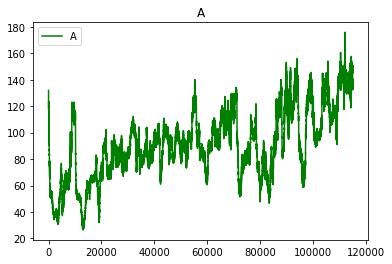

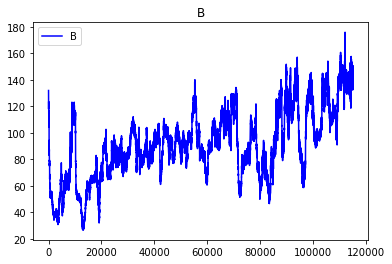

In [32]:
#----------------------------------------------
df_11[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_11[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

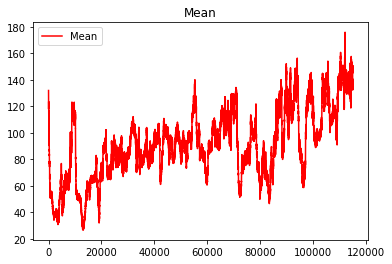

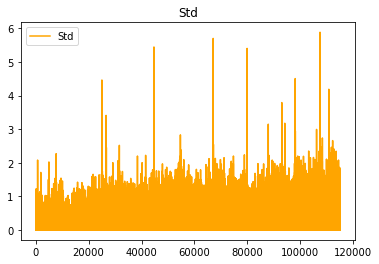

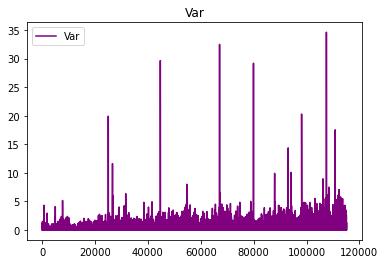

In [33]:
#----------------------------------------------
df_11[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_11[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_11[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito 21

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [34]:
#---------------------------------------------
df_A21 = pd.read_csv(ruta+"A_Circuito_21.AV")
df_B21 = pd.read_csv(ruta+"B_Circuito_21.AV")
#----------------------------------------------

#----------------------------------------------
df_A21['Values'] = df_A21['Values'].abs()
df_B21['Values'] = df_B21['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [35]:
#----------------------------------------------
df_21 = pd.merge(df_A21, df_B21, on ='Datetime')
df_21.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_21

,Datetime,A,B
0,2022-01-01 00:01:15,181.08,181.36
1,2022-01-01 00:01:15,181.36,181.36
2,2022-01-01 00:02:25,179.44,179.44
3,2022-01-01 00:04:44,181.28,181.28
4,2022-01-01 00:05:42,179.46,179.46
...,...,...,...
54046,2022-01-15 23:56:23,202.65,201.45
54047,2022-01-15 23:57:28,203.66,203.66
54048,2022-01-15 23:58:00,205.86,205.86
54049,2022-01-15 23:59:37,203.50,203.50


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [36]:
df_21['Mean'] = df_21[['A', 'B']].mean(axis = 1)
df_21

,Datetime,A,B,Mean
0,2022-01-01 00:01:15,181.08,181.36,181.22
1,2022-01-01 00:01:15,181.36,181.36,181.36
2,2022-01-01 00:02:25,179.44,179.44,179.44
3,2022-01-01 00:04:44,181.28,181.28,181.28
4,2022-01-01 00:05:42,179.46,179.46,179.46
...,...,...,...,...
54046,2022-01-15 23:56:23,202.65,201.45,202.05
54047,2022-01-15 23:57:28,203.66,203.66,203.66
54048,2022-01-15 23:58:00,205.86,205.86,205.86
54049,2022-01-15 23:59:37,203.50,203.50,203.50


### Desviación Estándar ###

In [37]:
df_21['Std'] = df_21[['A', 'B']].std(axis = 1)
df_21

,Datetime,A,B,Mean,Std
0,2022-01-01 00:01:15,181.08,181.36,181.22,0.197990
1,2022-01-01 00:01:15,181.36,181.36,181.36,0.000000
2,2022-01-01 00:02:25,179.44,179.44,179.44,0.000000
3,2022-01-01 00:04:44,181.28,181.28,181.28,0.000000
4,2022-01-01 00:05:42,179.46,179.46,179.46,0.000000
...,...,...,...,...,...
54046,2022-01-15 23:56:23,202.65,201.45,202.05,0.848528
54047,2022-01-15 23:57:28,203.66,203.66,203.66,0.000000
54048,2022-01-15 23:58:00,205.86,205.86,205.86,0.000000
54049,2022-01-15 23:59:37,203.50,203.50,203.50,0.000000


### Varianza ###

In [38]:
df_21['Var'] = df_21[['A', 'B']].var(axis = 1)
df_21

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:01:15,181.08,181.36,181.22,0.197990,0.0392
1,2022-01-01 00:01:15,181.36,181.36,181.36,0.000000,0.0000
2,2022-01-01 00:02:25,179.44,179.44,179.44,0.000000,0.0000
3,2022-01-01 00:04:44,181.28,181.28,181.28,0.000000,0.0000
4,2022-01-01 00:05:42,179.46,179.46,179.46,0.000000,0.0000
...,...,...,...,...,...,...
54046,2022-01-15 23:56:23,202.65,201.45,202.05,0.848528,0.7200
54047,2022-01-15 23:57:28,203.66,203.66,203.66,0.000000,0.0000
54048,2022-01-15 23:58:00,205.86,205.86,205.86,0.000000,0.0000
54049,2022-01-15 23:59:37,203.50,203.50,203.50,0.000000,0.0000


### Covarianza ###

In [39]:
df_21[['A','B']].cov()

,A,B
A,1284.256532,1284.217072
B,1284.217072,1284.592154


## Gráficación ##

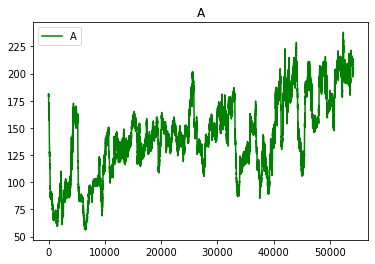

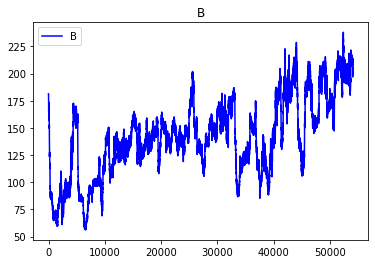

In [40]:
#----------------------------------------------
df_21[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_21[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

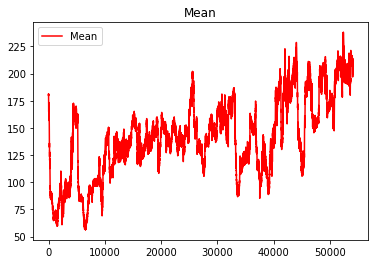

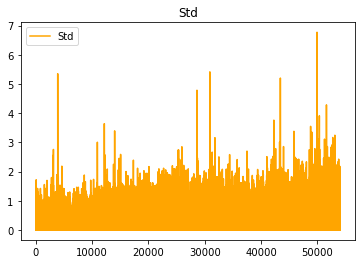

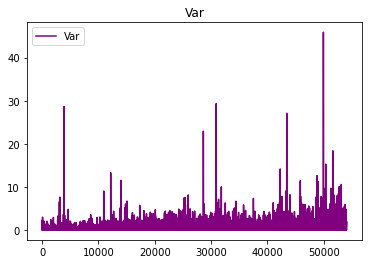

In [41]:
#----------------------------------------------
df_21[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_21[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_21[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito 26

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [42]:
#---------------------------------------------
df_A26 = pd.read_csv(ruta+"A_Circuito_26.AV")
df_B26 = pd.read_csv(ruta+"B_Circuito_26.AV")
#----------------------------------------------

#----------------------------------------------
df_A26['Values'] = df_A26['Values'].abs()
df_B26['Values'] = df_B26['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [43]:
#----------------------------------------------
df_26 = pd.merge(df_A26, df_B26, on ='Datetime')
df_26.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_26

,Datetime,A,B
0,2022-01-01 00:01:14,181.03,181.03
1,2022-01-01 00:02:26,179.76,179.19
2,2022-01-01 00:05:44,178.97,178.97
3,2022-01-01 00:06:48,180.83,180.83
4,2022-01-01 00:08:07,179.52,178.60
...,...,...,...
54878,2022-01-15 23:58:28,204.61,204.61
54879,2022-01-15 23:58:34,206.45,206.75
54880,2022-01-15 23:58:58,205.97,204.41
54881,2022-01-15 23:59:02,206.51,206.51


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [44]:
df_26['Mean'] = df_26[['A', 'B']].mean(axis = 1)
df_26

,Datetime,A,B,Mean
0,2022-01-01 00:01:14,181.03,181.03,181.030
1,2022-01-01 00:02:26,179.76,179.19,179.475
2,2022-01-01 00:05:44,178.97,178.97,178.970
3,2022-01-01 00:06:48,180.83,180.83,180.830
4,2022-01-01 00:08:07,179.52,178.60,179.060
...,...,...,...,...
54878,2022-01-15 23:58:28,204.61,204.61,204.610
54879,2022-01-15 23:58:34,206.45,206.75,206.600
54880,2022-01-15 23:58:58,205.97,204.41,205.190
54881,2022-01-15 23:59:02,206.51,206.51,206.510


### Desviación Estándar ###

In [45]:
df_26['Std'] = df_26[['A', 'B']].std(axis = 1)
df_26

,Datetime,A,B,Mean,Std
0,2022-01-01 00:01:14,181.03,181.03,181.030,0.000000
1,2022-01-01 00:02:26,179.76,179.19,179.475,0.403051
2,2022-01-01 00:05:44,178.97,178.97,178.970,0.000000
3,2022-01-01 00:06:48,180.83,180.83,180.830,0.000000
4,2022-01-01 00:08:07,179.52,178.60,179.060,0.650538
...,...,...,...,...,...
54878,2022-01-15 23:58:28,204.61,204.61,204.610,0.000000
54879,2022-01-15 23:58:34,206.45,206.75,206.600,0.212132
54880,2022-01-15 23:58:58,205.97,204.41,205.190,1.103087
54881,2022-01-15 23:59:02,206.51,206.51,206.510,0.000000


### Varianza ###

In [46]:
df_26['Var'] = df_26[['A', 'B']].var(axis = 1)
df_26

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:01:14,181.03,181.03,181.030,0.000000,0.00000
1,2022-01-01 00:02:26,179.76,179.19,179.475,0.403051,0.16245
2,2022-01-01 00:05:44,178.97,178.97,178.970,0.000000,0.00000
3,2022-01-01 00:06:48,180.83,180.83,180.830,0.000000,0.00000
4,2022-01-01 00:08:07,179.52,178.60,179.060,0.650538,0.42320
...,...,...,...,...,...,...
54878,2022-01-15 23:58:28,204.61,204.61,204.610,0.000000,0.00000
54879,2022-01-15 23:58:34,206.45,206.75,206.600,0.212132,0.04500
54880,2022-01-15 23:58:58,205.97,204.41,205.190,1.103087,1.21680
54881,2022-01-15 23:59:02,206.51,206.51,206.510,0.000000,0.00000


### Covarianza ###

In [47]:
df_26[['A','B']].cov()

,A,B
A,1268.639064,1268.587400
B,1268.587400,1268.941653


## Gráficación ##

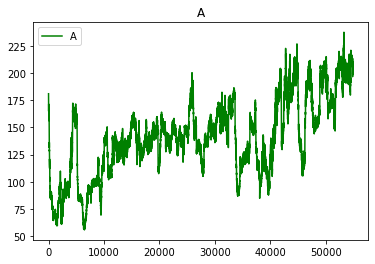

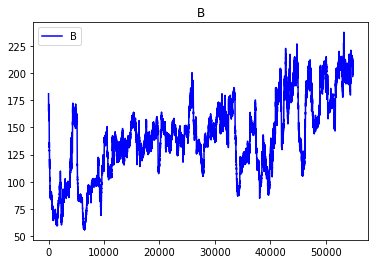

In [48]:
#----------------------------------------------
df_26[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_26[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

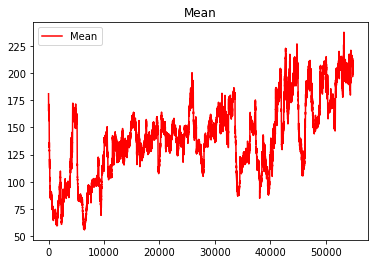

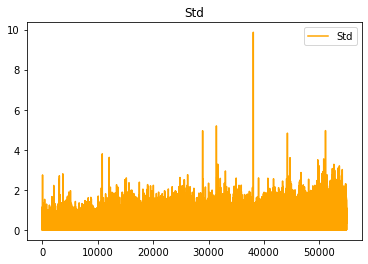

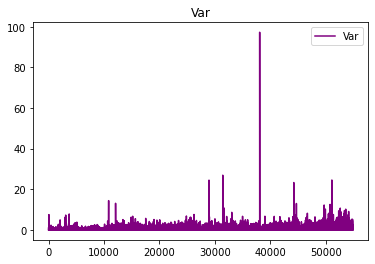

In [49]:
#----------------------------------------------
df_26[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_26[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_26[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito 70

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [50]:
#---------------------------------------------
df_A70 = pd.read_csv(ruta+"A_Circuito_70.AV")
df_B70 = pd.read_csv(ruta+"B_Circuito_70.AV")
#----------------------------------------------

#----------------------------------------------
df_A70['Values'] = df_A70['Values'].abs()
df_B70['Values'] = df_B70['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [51]:
#----------------------------------------------
df_70 = pd.merge(df_A70, df_B70, on ='Datetime')
df_70.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_70

,Datetime,A,B
0,2022-01-01 00:02:16,63.4,63.4
1,2022-01-01 00:05:50,74.3,74.3
2,2022-01-01 00:12:24,63.0,63.0
3,2022-01-01 00:12:41,77.3,77.3
4,2022-01-01 00:17:27,75.0,75.0
...,...,...,...
16825,2022-01-15 23:52:28,168.4,168.4
16826,2022-01-15 23:56:52,168.5,168.5
16827,2022-01-15 23:57:48,156.8,156.8
16828,2022-01-15 23:58:07,144.0,144.0


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [52]:
df_70['Mean'] = df_70[['A', 'B']].mean(axis = 1)
df_70

,Datetime,A,B,Mean
0,2022-01-01 00:02:16,63.4,63.4,63.4
1,2022-01-01 00:05:50,74.3,74.3,74.3
2,2022-01-01 00:12:24,63.0,63.0,63.0
3,2022-01-01 00:12:41,77.3,77.3,77.3
4,2022-01-01 00:17:27,75.0,75.0,75.0
...,...,...,...,...
16825,2022-01-15 23:52:28,168.4,168.4,168.4
16826,2022-01-15 23:56:52,168.5,168.5,168.5
16827,2022-01-15 23:57:48,156.8,156.8,156.8
16828,2022-01-15 23:58:07,144.0,144.0,144.0


### Desviación Estándar ###

In [53]:
df_70['Std'] = df_70[['A', 'B']].std(axis = 1)
df_70

,Datetime,A,B,Mean,Std
0,2022-01-01 00:02:16,63.4,63.4,63.4,0.0
1,2022-01-01 00:05:50,74.3,74.3,74.3,0.0
2,2022-01-01 00:12:24,63.0,63.0,63.0,0.0
3,2022-01-01 00:12:41,77.3,77.3,77.3,0.0
4,2022-01-01 00:17:27,75.0,75.0,75.0,0.0
...,...,...,...,...,...
16825,2022-01-15 23:52:28,168.4,168.4,168.4,0.0
16826,2022-01-15 23:56:52,168.5,168.5,168.5,0.0
16827,2022-01-15 23:57:48,156.8,156.8,156.8,0.0
16828,2022-01-15 23:58:07,144.0,144.0,144.0,0.0


### Varianza ###

In [54]:
df_70['Var'] = df_70[['A', 'B']].var(axis = 1)
df_70

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:02:16,63.4,63.4,63.4,0.0,0.0
1,2022-01-01 00:05:50,74.3,74.3,74.3,0.0,0.0
2,2022-01-01 00:12:24,63.0,63.0,63.0,0.0,0.0
3,2022-01-01 00:12:41,77.3,77.3,77.3,0.0,0.0
4,2022-01-01 00:17:27,75.0,75.0,75.0,0.0,0.0
...,...,...,...,...,...,...
16825,2022-01-15 23:52:28,168.4,168.4,168.4,0.0,0.0
16826,2022-01-15 23:56:52,168.5,168.5,168.5,0.0,0.0
16827,2022-01-15 23:57:48,156.8,156.8,156.8,0.0,0.0
16828,2022-01-15 23:58:07,144.0,144.0,144.0,0.0,0.0


### Covarianza ###

In [55]:
df_70[['A','B']].cov()

,A,B
A,9546.967414,9542.286617
B,9542.286617,9545.113254


## Gráficación ##

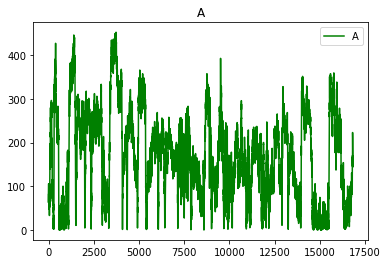

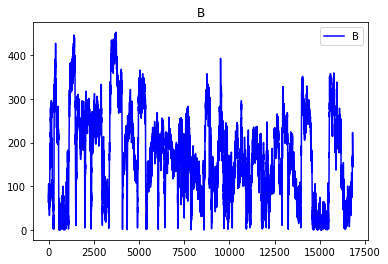

In [56]:
#----------------------------------------------
df_70[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_70[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

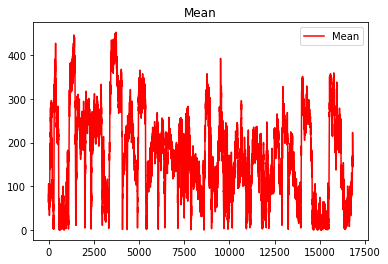

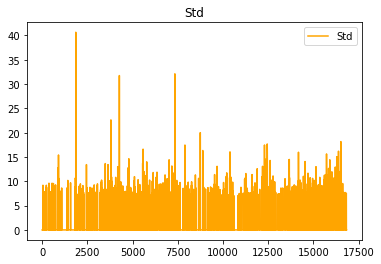

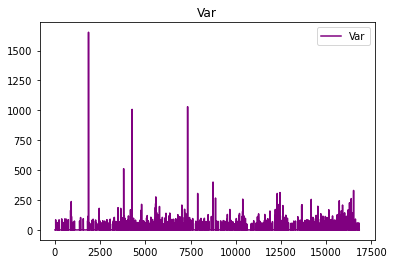

In [57]:
#----------------------------------------------
df_70[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_70[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_70[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------

# Circuito A1

## Lectura y Conversion de los Dataframes a valores absolutos ##

In [58]:
#---------------------------------------------
df_AA1 = pd.read_csv(ruta+"A_Circuito_A1.AV")
df_BA1 = pd.read_csv(ruta+"B_Circuito_A1.AV")
#----------------------------------------------

#----------------------------------------------
df_AA1['Values'] = df_AA1['Values'].abs()
df_BA1['Values'] = df_BA1['Values'].abs()
#----------------------------------------------

## Unión de los Dataframes 'A' y 'B'

In [59]:
#----------------------------------------------
df_A1 = pd.merge(df_AA1, df_BA1, on ='Datetime')
df_A1.rename(columns = {'Values_x' : 'A', 'Values_y' : 'B'}, inplace = True)
#----------------------------------------------

df_A1

,Datetime,A,B
0,2022-01-01 00:00:06,181.3,182.1
1,2022-01-01 00:00:09,180.0,180.0
2,2022-01-01 00:00:21,182.5,182.5
3,2022-01-01 00:00:21,182.0,182.5
4,2022-01-01 00:00:27,179.8,179.8
...,...,...,...
332522,2022-01-15 23:59:50,168.8,168.8
332523,2022-01-15 23:59:51,175.7,175.7
332524,2022-01-15 23:59:53,174.9,174.9
332525,2022-01-15 23:59:54,172.5,172.5


## Operaciones aritméticas realizadas sobre el Dataframe ##

### Media ###

In [60]:
df_A1['Mean'] = df_A1[['A', 'B']].mean(axis = 1)
df_A1

,Datetime,A,B,Mean
0,2022-01-01 00:00:06,181.3,182.1,181.70
1,2022-01-01 00:00:09,180.0,180.0,180.00
2,2022-01-01 00:00:21,182.5,182.5,182.50
3,2022-01-01 00:00:21,182.0,182.5,182.25
4,2022-01-01 00:00:27,179.8,179.8,179.80
...,...,...,...,...
332522,2022-01-15 23:59:50,168.8,168.8,168.80
332523,2022-01-15 23:59:51,175.7,175.7,175.70
332524,2022-01-15 23:59:53,174.9,174.9,174.90
332525,2022-01-15 23:59:54,172.5,172.5,172.50


### Desviación Estándar ###

In [61]:
df_A1['Std'] = df_A1[['A', 'B']].std(axis = 1)
df_A1

,Datetime,A,B,Mean,Std
0,2022-01-01 00:00:06,181.3,182.1,181.70,0.565685
1,2022-01-01 00:00:09,180.0,180.0,180.00,0.000000
2,2022-01-01 00:00:21,182.5,182.5,182.50,0.000000
3,2022-01-01 00:00:21,182.0,182.5,182.25,0.353553
4,2022-01-01 00:00:27,179.8,179.8,179.80,0.000000
...,...,...,...,...,...
332522,2022-01-15 23:59:50,168.8,168.8,168.80,0.000000
332523,2022-01-15 23:59:51,175.7,175.7,175.70,0.000000
332524,2022-01-15 23:59:53,174.9,174.9,174.90,0.000000
332525,2022-01-15 23:59:54,172.5,172.5,172.50,0.000000


### Varianza ###

In [62]:
df_A1['Var'] = df_A1[['A', 'B']].var(axis = 1)
df_A1

,Datetime,A,B,Mean,Std,Var
0,2022-01-01 00:00:06,181.3,182.1,181.70,0.565685,0.320
1,2022-01-01 00:00:09,180.0,180.0,180.00,0.000000,0.000
2,2022-01-01 00:00:21,182.5,182.5,182.50,0.000000,0.000
3,2022-01-01 00:00:21,182.0,182.5,182.25,0.353553,0.125
4,2022-01-01 00:00:27,179.8,179.8,179.80,0.000000,0.000
...,...,...,...,...,...,...
332522,2022-01-15 23:59:50,168.8,168.8,168.80,0.000000,0.000
332523,2022-01-15 23:59:51,175.7,175.7,175.70,0.000000,0.000
332524,2022-01-15 23:59:53,174.9,174.9,174.90,0.000000,0.000
332525,2022-01-15 23:59:54,172.5,172.5,172.50,0.000000,0.000


### Covarianza ###

In [63]:
df_A1[['A','B']].cov()

,A,B
A,7644.953859,7644.260224
B,7644.260224,7645.890349


## Gráficación ##

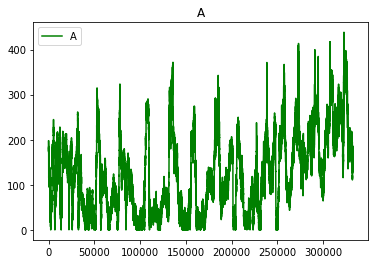

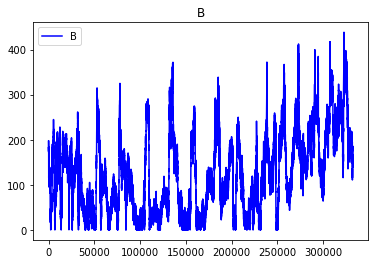

In [64]:
#----------------------------------------------
df_A1[['A']].plot(color="green")
plt.title('A')
plt.show()
#----------------------------------------------
df_A1[['B']].plot(color="blue")
plt.title('B')
plt.show()
#----------------------------------------------

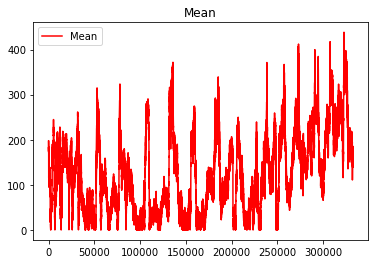

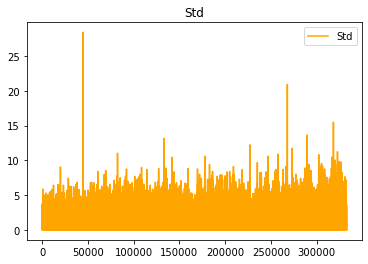

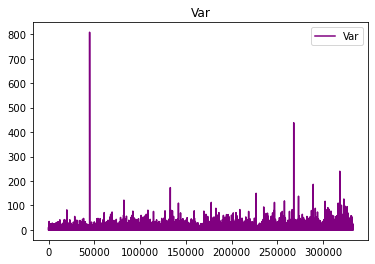

In [65]:
#----------------------------------------------
df_A1[['Mean']].plot(color="red")
plt.title('Mean')
plt.show()
#----------------------------------------------
df_A1[['Std']].plot(color="orange")
plt.title('Std')
plt.show()
#----------------------------------------------
df_A1[['Var']].plot(color="purple")
plt.title('Var')
plt.show()
#----------------------------------------------